# K-MEANS Y HIERARCHICAL CLUSTERING 

In [54]:
#Importamos las librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [55]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Mall_Customers.csv")


## Realizar un análisis exploratorio de los datos

In [56]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
data.shape

(200, 5)

In [58]:
#Eliminamos la columna de CustomerID ya que solo contabiliza la cantidad de datos pero no da informacion de los mismos. 
data=data.drop(['CustomerID'], axis=1)

In [59]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [60]:
data.shape

(200, 4)

In [61]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


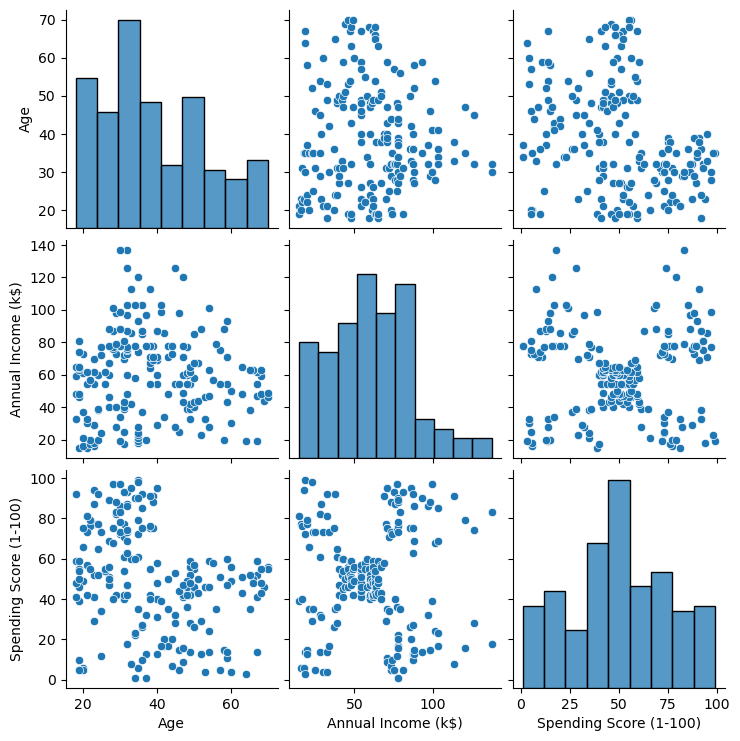

In [62]:
# Visualización de la distribución de variables numéricas
sns.pairplot(data)
plt.show()

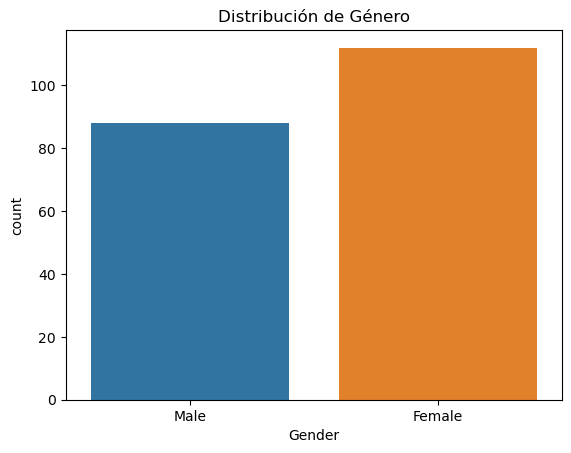

In [63]:
# Visualización de variables categóricas 
sns.countplot(x="Gender", data=data)
plt.title("Distribución de Género")
plt.show()

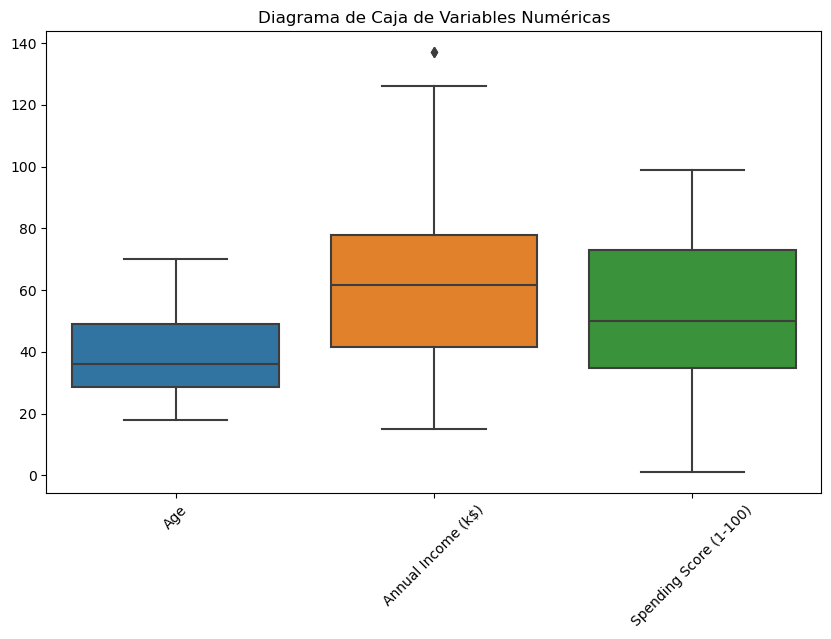

In [64]:
# Visualización de posibles valores atípicos
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title("Diagrama de Caja de Variables Numéricas")
plt.xticks(rotation=45)
plt.show()

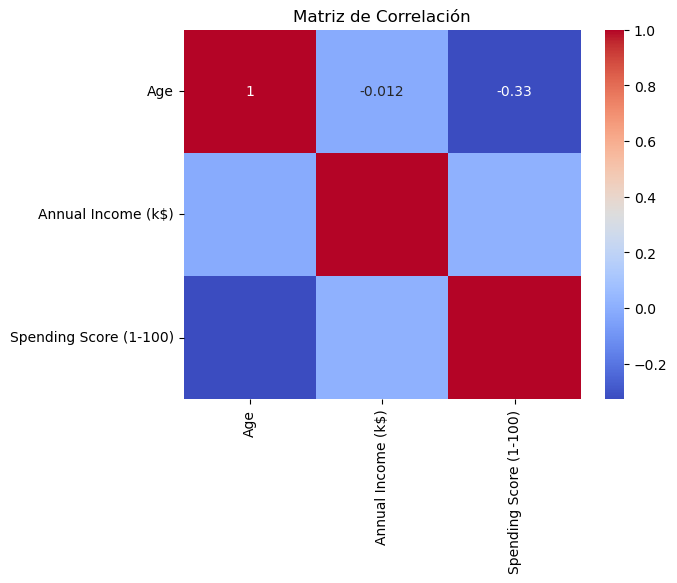

In [65]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualización de la matriz de correlación
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [66]:
#verificamos datos nulos en la data
data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### observamos que no tenemos dato nulos 

In [67]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación de etiquetas a la variable "Gender"
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Estandarizar los datos
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Mostrar los primeros registros del conjunto de datos estandarizado con "Gender" codificado
print(X.head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


# K-MEANS

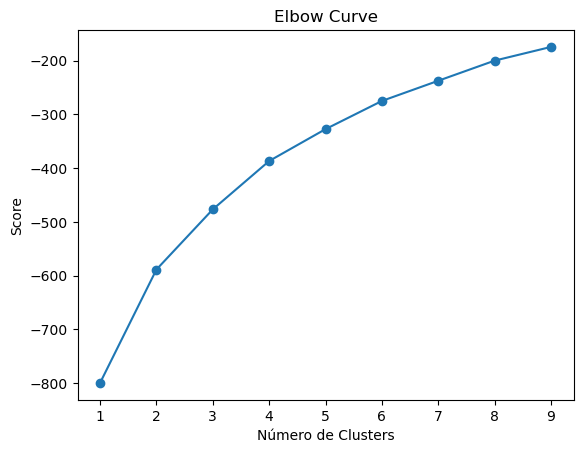

In [68]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.12815215,  0.75982983,  0.07086791, -0.81492926],
       [-0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [-0.88640526,  0.64256818, -0.09498735, -0.59494042],
       [ 1.12815215, -0.76072691,  0.05496398,  0.83369302]])

In [70]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan', 'blue']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 


In [71]:
# Obtenemos las variables del conjunto de datos
variables = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Generamos todas las posibles combinaciones de las variables
from itertools import combinations
variable_combinations = list(combinations(variables, 2))

# Mostramos las posibles combinaciones
print("Posibles combinaciones de variables:")
for combination in variable_combinations:
    print(combination)


Posibles combinaciones de variables:
('Gender', 'Age')
('Gender', 'Annual Income (k$)')
('Gender', 'Spending Score (1-100)')
('Age', 'Annual Income (k$)')
('Age', 'Spending Score (1-100)')
('Annual Income (k$)', 'Spending Score (1-100)')


### Combinación: ('Gender', 'Age')

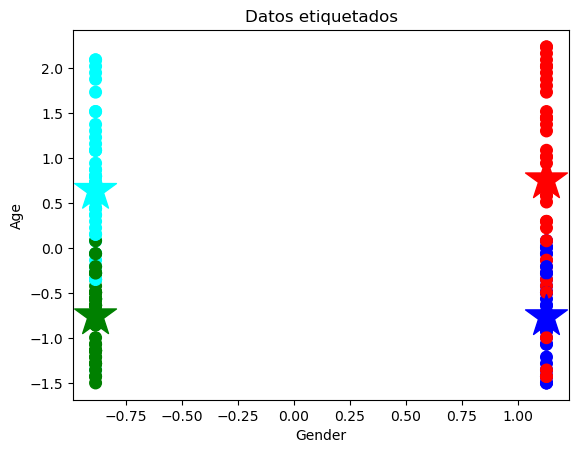

In [72]:
f1 = X['Gender'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


### Combinación: ('Gender', 'Annual Income (k$)')

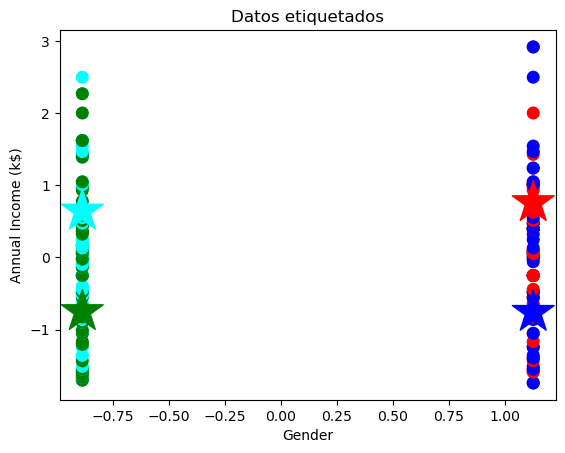

In [73]:
f1 = X['Gender'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()


### Combinación: ('Gender', 'Spending Score (1-100)')

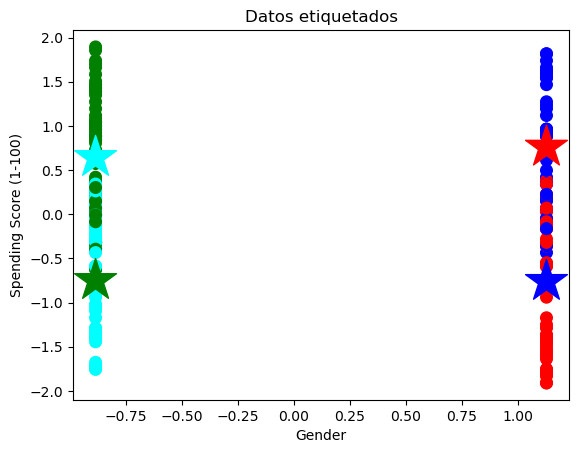

In [74]:
f1 = X['Gender'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Combinación: ('Age', 'Annual Income (k$)')

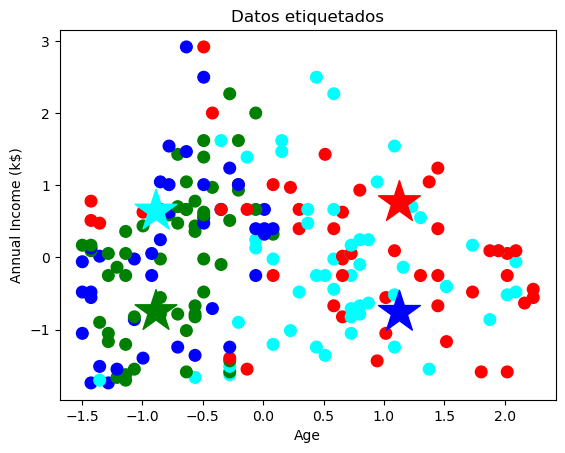

In [75]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


### Combinación: ('Age', 'Spending Score (1-100)')

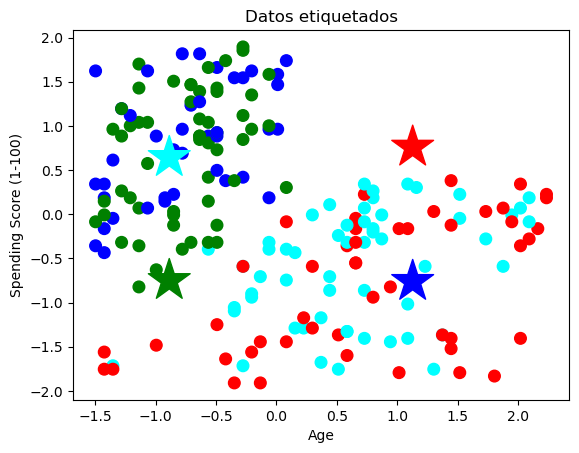

In [76]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Combinación: ('Annual Income (k$)', 'Spending Score (1-100)')

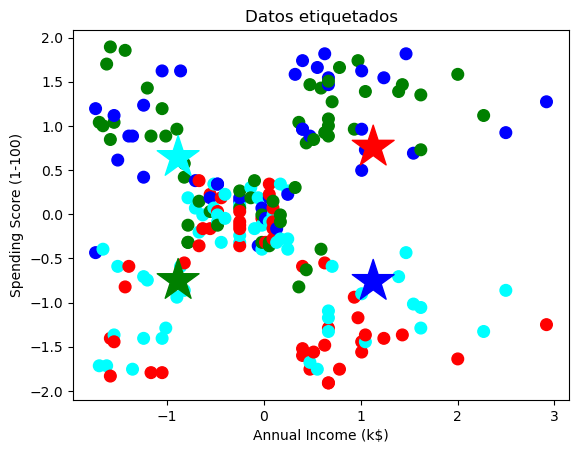

In [77]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [78]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)


[2]
['cyan']


In [79]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3012323168801352
Índice de Calinski-Harabasz: 69.7825558048305
Inertia (suma de cuadrados dentro de los clusters): 386.82842558376666
Davies-Bouldin Index: 1.2918188338173229


# HIERARCHICAL CLUSTERING 

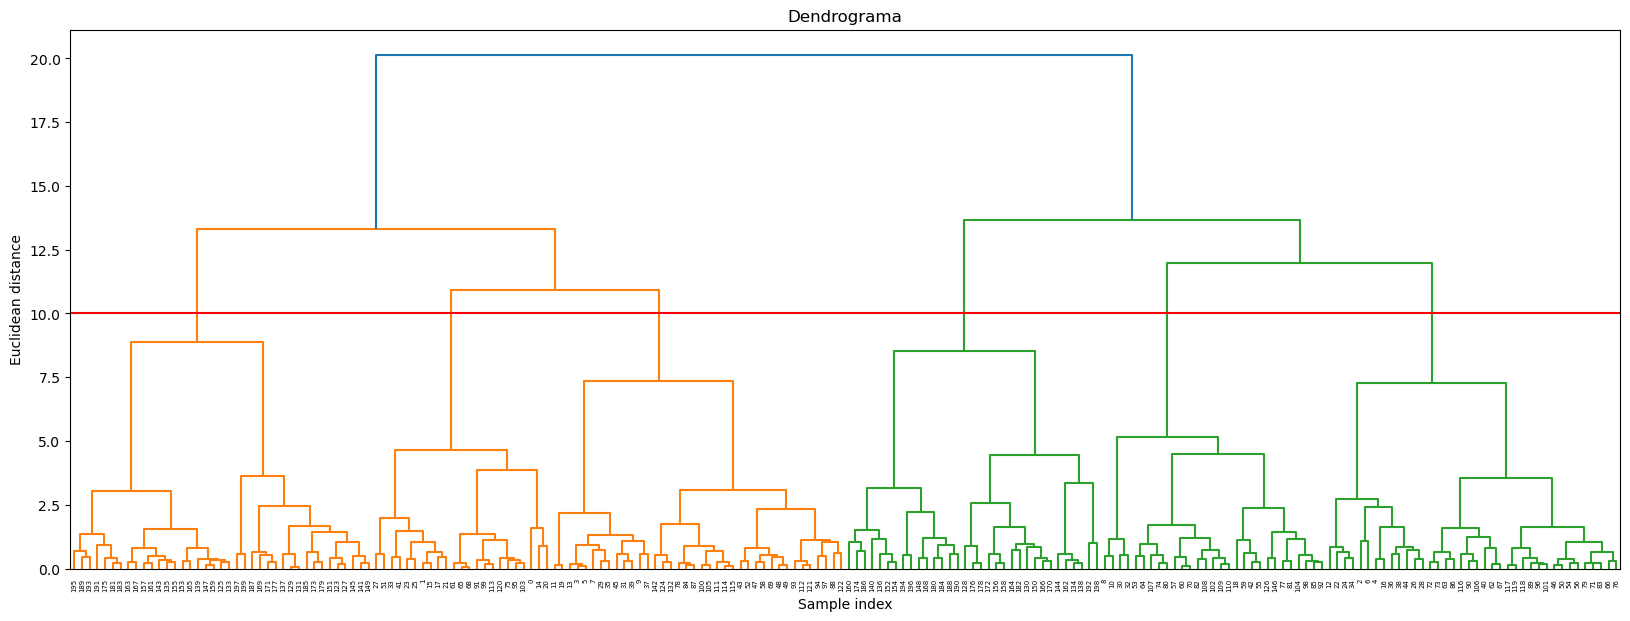

In [84]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [85]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([5, 5, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 3, 1, 5, 5, 3, 5, 4, 1, 5, 5,
       3, 5, 3, 5, 3, 5, 3, 1, 4, 1, 4, 5, 3, 1, 3, 1, 3, 1, 3, 5, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 5, 1, 4, 3, 4, 3, 4, 1, 4, 4, 5, 3, 3, 4, 5,
       3, 3, 5, 1, 4, 3, 3, 3, 4, 5, 3, 4, 1, 3, 4, 4, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 5, 4, 1, 1, 5, 3, 1, 4, 5, 1, 3, 4, 5, 4, 1, 3, 4, 4, 4,
       4, 1, 1, 5, 1, 1, 3, 3, 3, 3, 5, 1, 1, 0, 1, 0, 4, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [86]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan', 'blue', 'orange', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

### Combinación: ('Gender', 'Age')

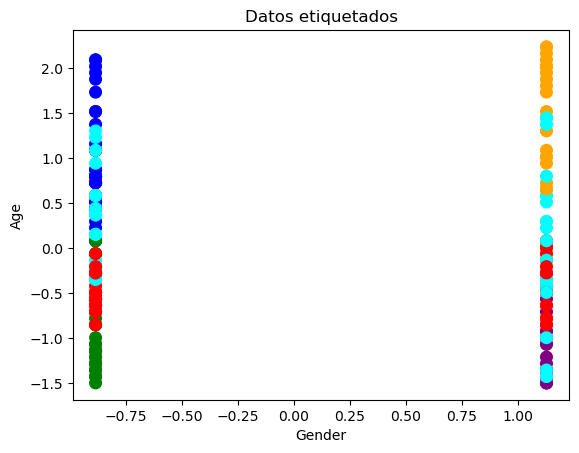

In [89]:
f1 = X['Gender'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

### Combinación: ('Gender', 'Annual Income (k$)')

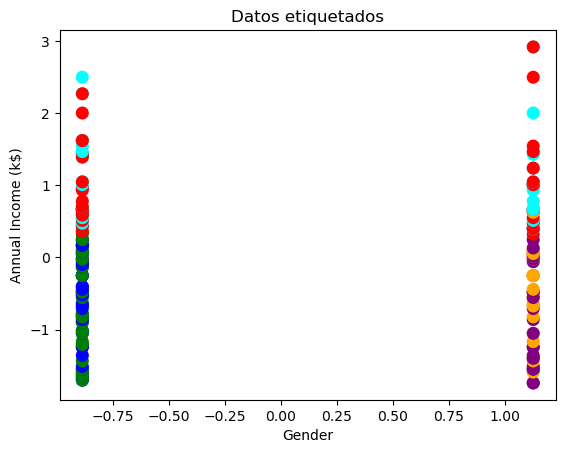

In [90]:
f1 = X['Gender'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

### Combinación: ('Gender', 'Spending Score (1-100)')

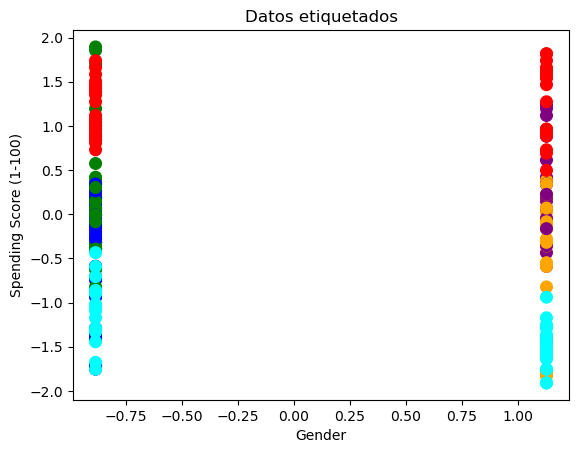

In [92]:
f1 = X['Gender'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Combinación: ('Age', 'Annual Income (k$)')

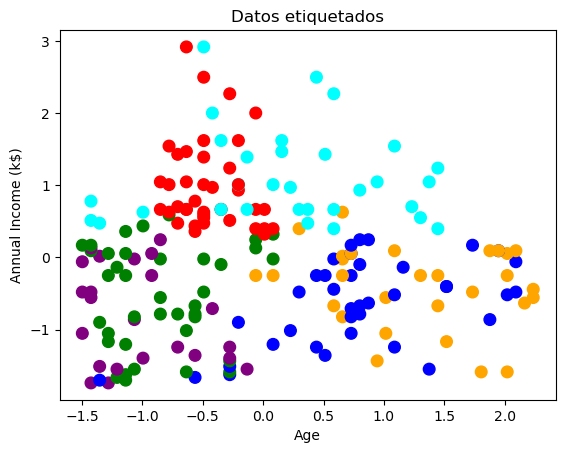

In [95]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


### Combinación: ('Age', 'Spending Score (1-100)')

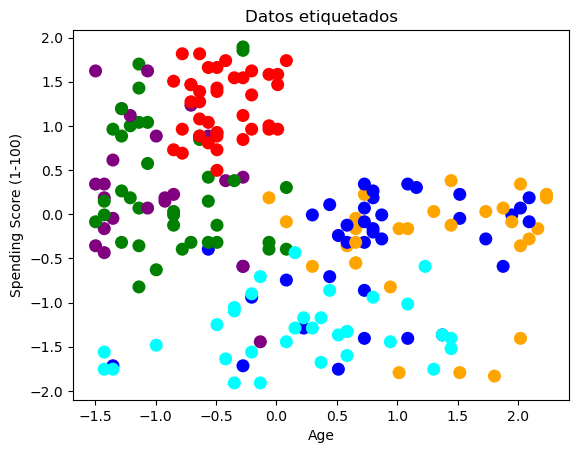

In [96]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Combinación: ('Annual Income (k$)', 'Spending Score (1-100)')

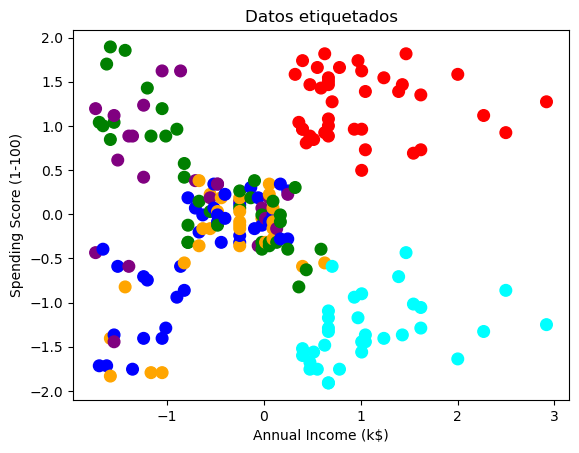

In [98]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [99]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

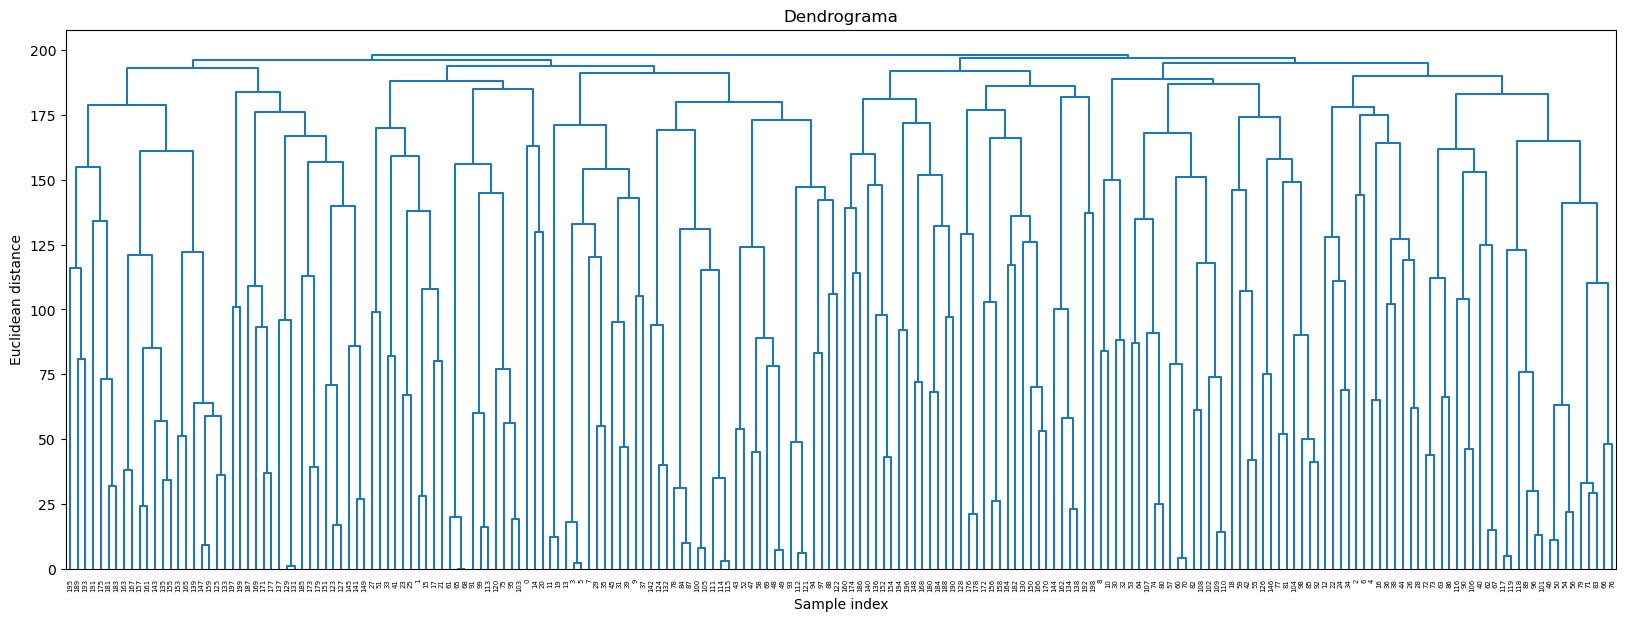

In [100]:
plot_dendrogram(hier_clustering, color_threshold=0)

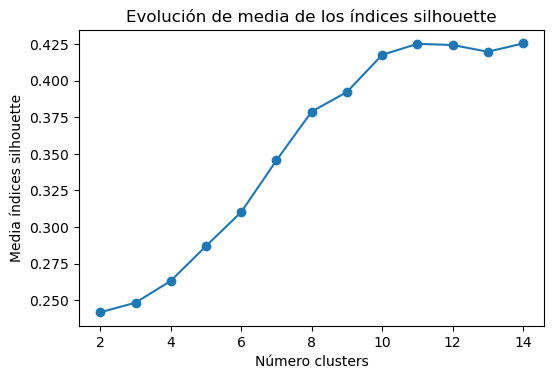

In [101]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [102]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.31024459685260536
Índice de Calinski-Harabasz: 70.22708890672489
Davies-Bouldin Index: 1.0729080656431615


In [103]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.5956238167278256, array([ 4.64278735, 20.11762535, 10.9330832 , ..., 20.11762535,
        0.5647686 , 20.11762535]))
